<a href="https://colab.research.google.com/github/MoonlightO2/Crime-data-UK-2023/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crimes in the UK 2023 Data Analysis**

Dataset: https://www.kaggle.com/datasets/marshuu/crimes-in-uk-2023

In [1]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

In [2]:
'''
# Step 1: Upload Kaggle API key to Colab
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
uploaded = files.upload()

# Move the uploaded file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset using Kaggle API
# Install the Kaggle library
!pip install kaggle

# Download the dataset
!kaggle datasets download -d marshuu/crimes-in-uk-2023

# Move the downloaded dataset to the desired folder in Google Drive
!mv crimes-in-uk-2023.zip "/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Datasets/"

# Change the current working directory to the destination folder
os.chdir("/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Datasets/")

# Unzip the downloaded dataset
!unzip crimes-in-uk-2023.zip
'''

'\n# Step 1: Upload Kaggle API key to Colab\nfrom google.colab import files\n\n# Upload your Kaggle API key (kaggle.json) file\nuploaded = files.upload()\n\n# Move the uploaded file to the correct location\n!mkdir -p ~/.kaggle\n!mv kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n\n# Step 2: Download the dataset using Kaggle API\n# Install the Kaggle library\n!pip install kaggle\n\n# Download the dataset\n!kaggle datasets download -d marshuu/crimes-in-uk-2023\n\n# Move the downloaded dataset to the desired folder in Google Drive\n!mv crimes-in-uk-2023.zip "/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Datasets/"\n\n# Change the current working directory to the destination folder\nos.chdir("/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Datasets/")\n\n# Unzip the downloaded dataset\n!unzip crimes-in-uk-2023.zip\n'

In [3]:
# Specify the path to your CSV files
files = glob.glob('/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Datasets/*.csv')

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for file in files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)

    # Concatenate the DataFrame to the main DataFrame
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/UK_Crimes_2023.csv', index=False)

In [4]:
crime_dataset = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/UK_Crimes_2023.csv'
crime_map_doc = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Crime Data Analysis/Crime_Map.html'

In [5]:
data = pd.read_csv(crime_dataset)
print('Shape: ', data.shape, '\n')
data.head(2)

Shape:  (478347, 12) 



,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN


In [6]:
drop_c = ['Crime ID', 'Context']
data = data.drop(columns=drop_c)
data.head(2)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN
1,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect


In [7]:
print(data.columns.tolist())

['Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category']


In [8]:
# Get unique values and count for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = {
        'Unique Values': data[column].unique(),
        'Number of Unique Values': data[column].nunique()
    }

# Display the results
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Number of Unique Values: {values['Number of Unique Values']}")
    print("Unique Values:")
    print(values['Unique Values'])
    print("\n" + "-"*50 + "\n")

Column: Month
Number of Unique Values: 1
Unique Values:
['2023-01']

--------------------------------------------------

Column: Reported by
Number of Unique Values: 43
Unique Values:
['Avon and Somerset Constabulary' 'Durham Constabulary' 'Kent Police'
 'Essex Police' 'Cleveland Police' 'City of London Police'
 'Metropolitan Police Service' 'Gloucestershire Constabulary'
 'Gwent Police' 'Dorset Police' 'Dyfed-Powys Police' 'Merseyside Police'
 'Humberside Police' 'Leicestershire Police' 'Lincolnshire Police'
 'Hertfordshire Constabulary' 'Bedfordshire Police'
 'Lancashire Constabulary' 'Cambridgeshire Constabulary'
 'Cumbria Constabulary' 'British Transport Police'
 'Hampshire Constabulary' 'Derbyshire Constabulary'
 'Cheshire Constabulary' 'West Mercia Police'
 'Police Service of Northern Ireland' 'Norfolk Constabulary'
 'Warwickshire Police' 'Surrey Police' 'West Midlands Police'
 'Thames Valley Police' 'North Wales Police' 'Nottinghamshire Police'
 'South Wales Police' 'Staffordshi

In [9]:
data.describe()

,Longitude,Latitude
count,470741.000000,470741.000000
mean,-1.291760,52.473080
std,1.415093,1.153814
min,-8.106383,50.122269
25%,-1.998217,51.512811
50%,-1.260409,52.282746
75%,-0.173219,53.411539
max,2.057678,57.144559


In [10]:
'''
# Monthly trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Crime Count', data=data.groupby('Month').size().reset_index(name='Crime Count'))
plt.title('Monthly Crime Trend')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()
'''

"\n# Monthly trend\nplt.figure(figsize=(10, 6))\nsns.lineplot(x='Month', y='Crime Count', data=data.groupby('Month').size().reset_index(name='Crime Count'))\nplt.title('Monthly Crime Trend')\nplt.xlabel('Month')\nplt.ylabel('Number of Crimes')\nplt.show()\n"

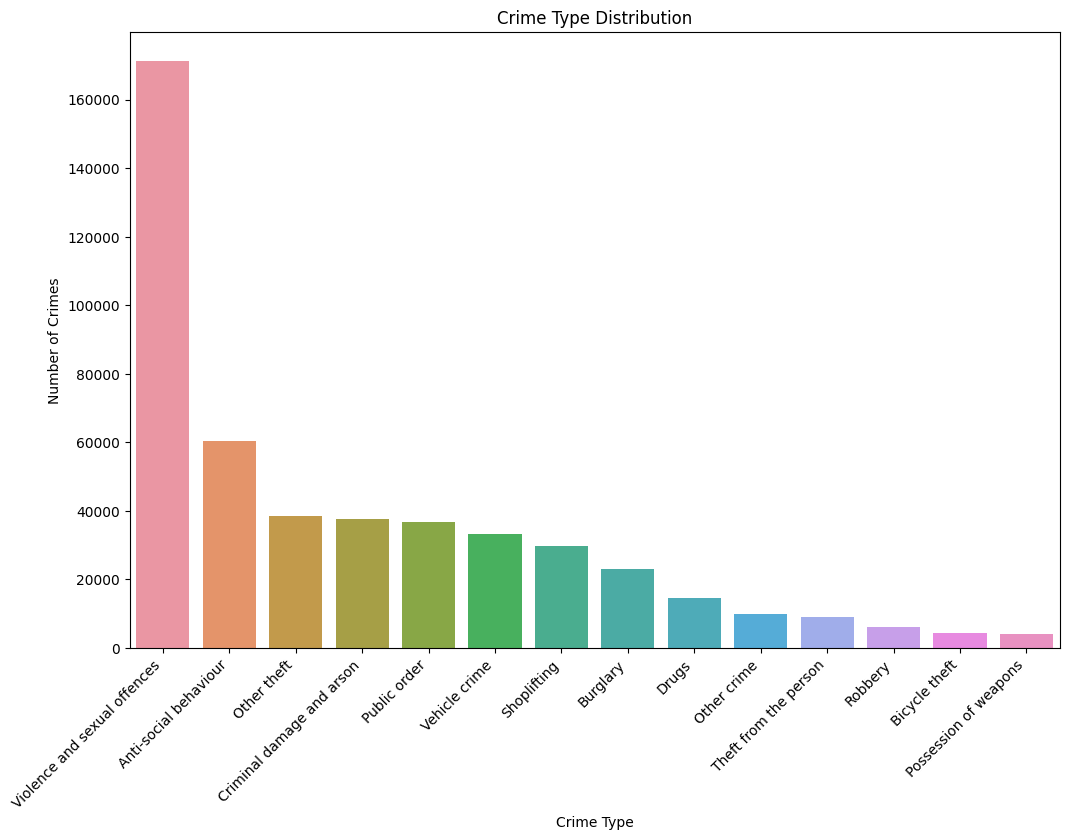

In [11]:
# Crime type distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Crime type', data=data, order=data['Crime type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Crime Type Distribution')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

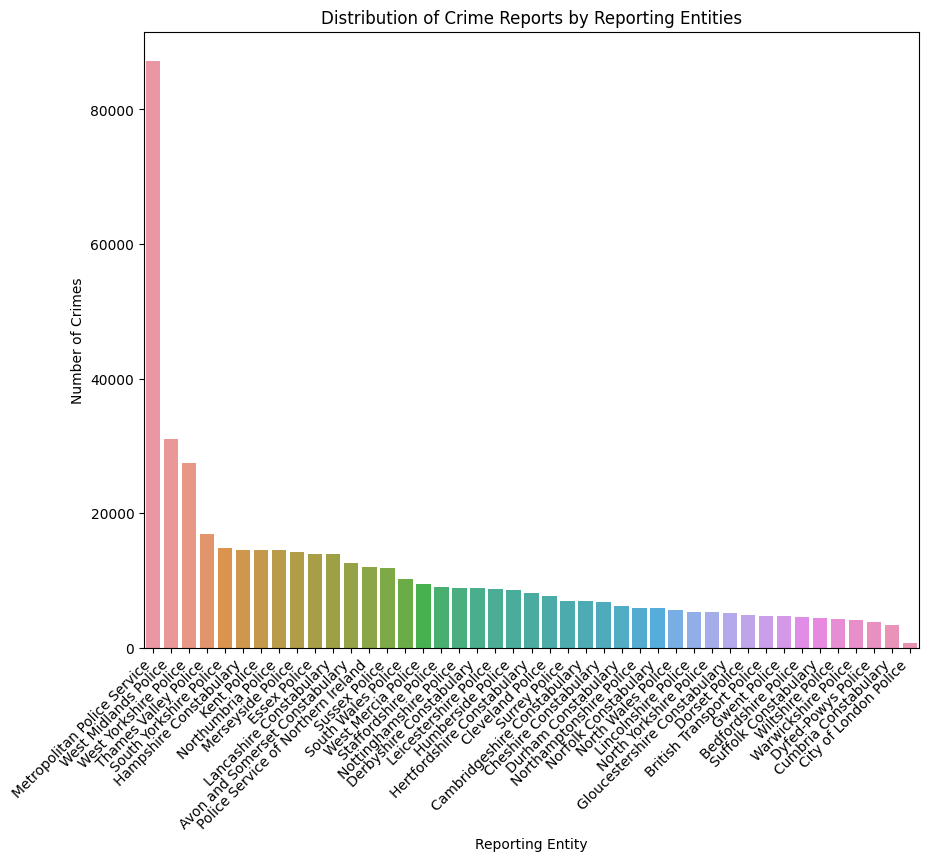

In [12]:
# Reported by distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='Reported by', data=data, order=data['Reported by'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crime Reports by Reporting Entities')
plt.xlabel('Reporting Entity')
plt.ylabel('Number of Crimes')
plt.show()

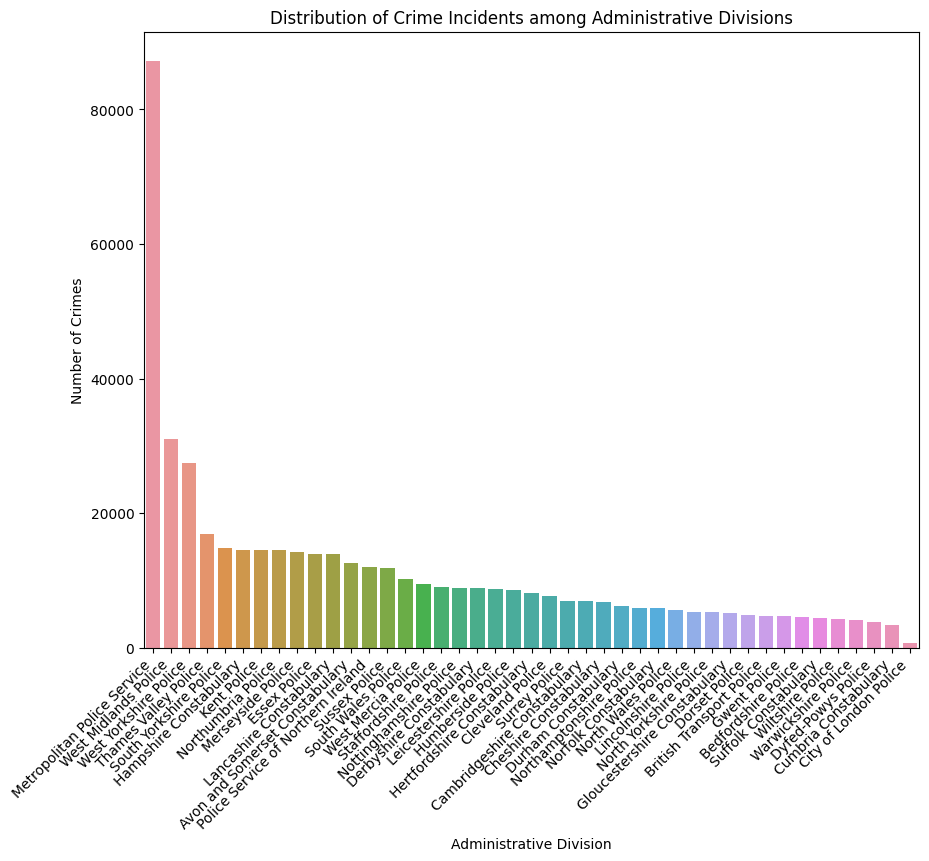

In [13]:
# Falls within distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='Falls within', data=data, order=data['Falls within'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crime Incidents among Administrative Divisions')
plt.xlabel('Administrative Division')
plt.ylabel('Number of Crimes')
plt.show()

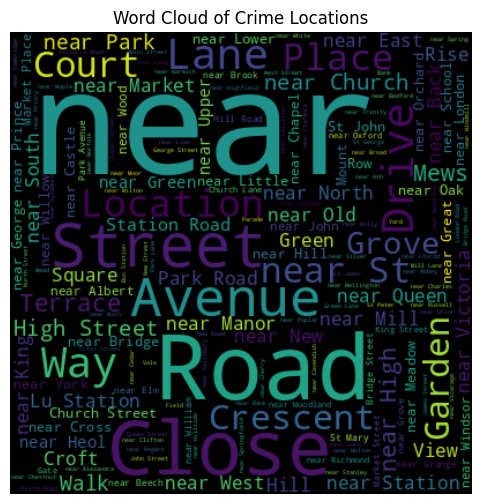

In [14]:
# Location word cloud or bar plot
# (Note: Word cloud libraries need to be installed separately, e.g., wordcloud and matplotlib)
from wordcloud import WordCloud

location_text = ' '.join(data['Location'].astype(str))
wordcloud = WordCloud(width=400, height=400, background_color='black').generate(location_text)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Crime Locations')
plt.show()

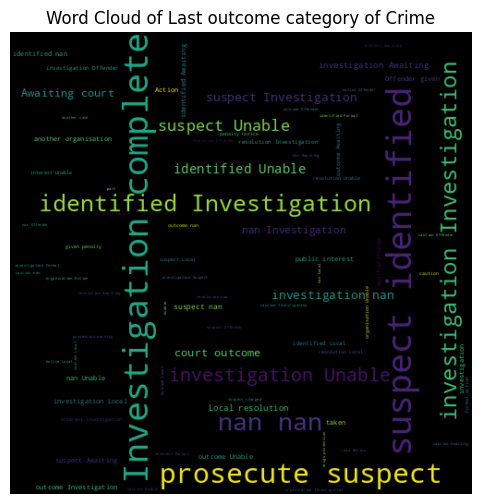

In [15]:
# Context bar plot or word cloud
context_text = ' '.join(data['Last outcome category'].astype(str))
wordcloud_context = WordCloud(width=500, height=500, background_color='black').generate(context_text)

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_context, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Last outcome category of Crime')
plt.show()

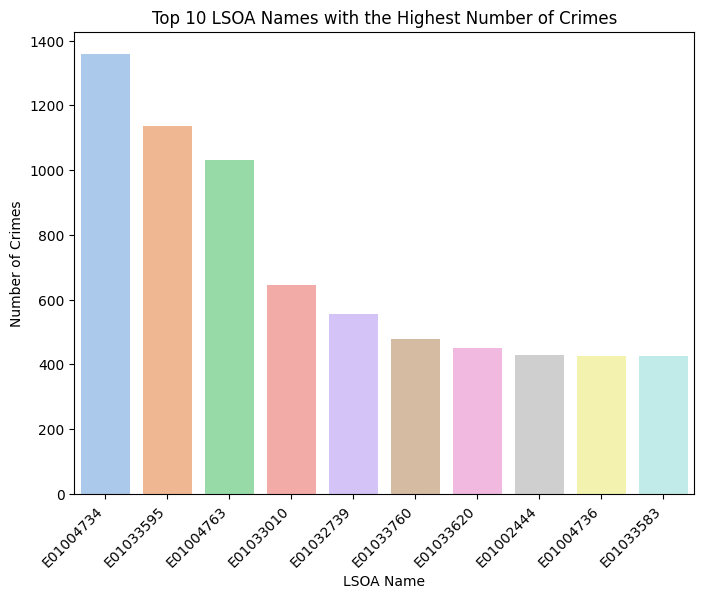

In [16]:
sns.set_palette("pastel")

# Top 10 LSOA codes and names bar plot
top_lsoa_codes = data['LSOA code'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_lsoa_codes.index, y=top_lsoa_codes.values, order=top_lsoa_codes.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 LSOA Names with the Highest Number of Crimes')
plt.xlabel('LSOA Name')
plt.ylabel('Number of Crimes')
plt.show()

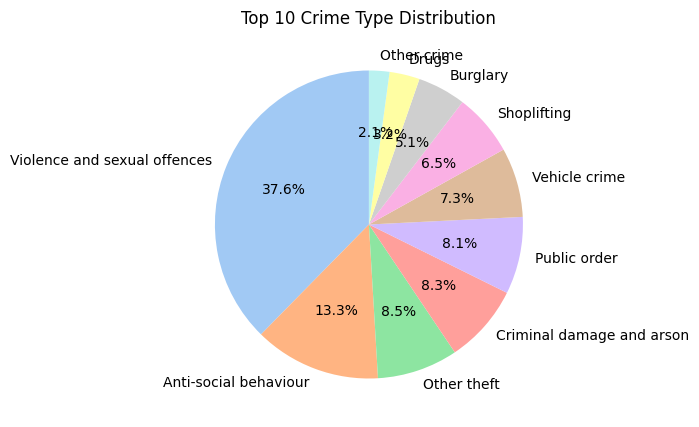

In [17]:
# Top 10 Crime type distribution pie chart
top_crime_types = data['Crime type'].value_counts().nlargest(10)
plt.figure(figsize=(5, 5))
top_crime_types.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Crime Type Distribution')
plt.ylabel('')
plt.show()

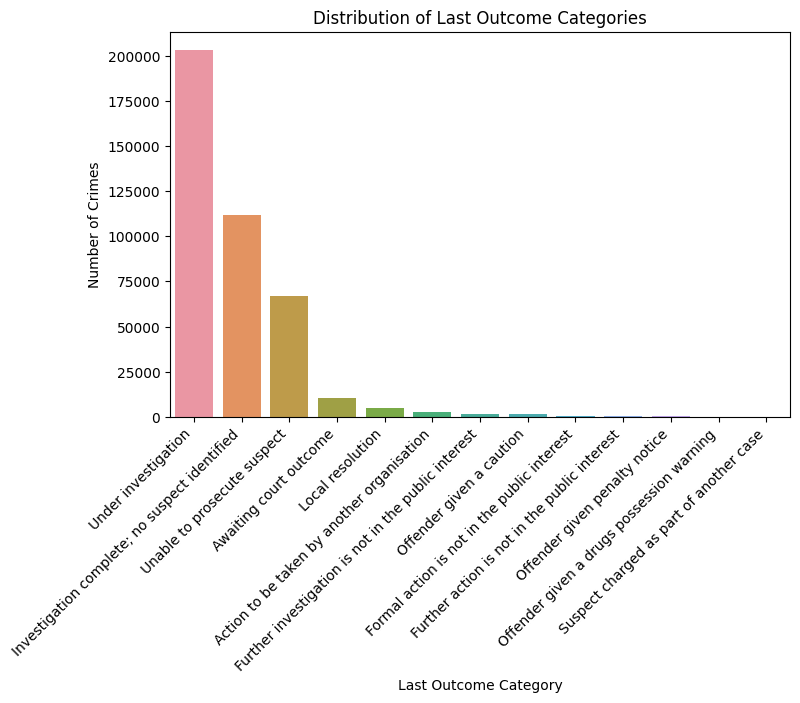

In [18]:
# Last outcome category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Last outcome category', data=data, order=data['Last outcome category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Last Outcome Categories')
plt.xlabel('Last Outcome Category')
plt.ylabel('Number of Crimes')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


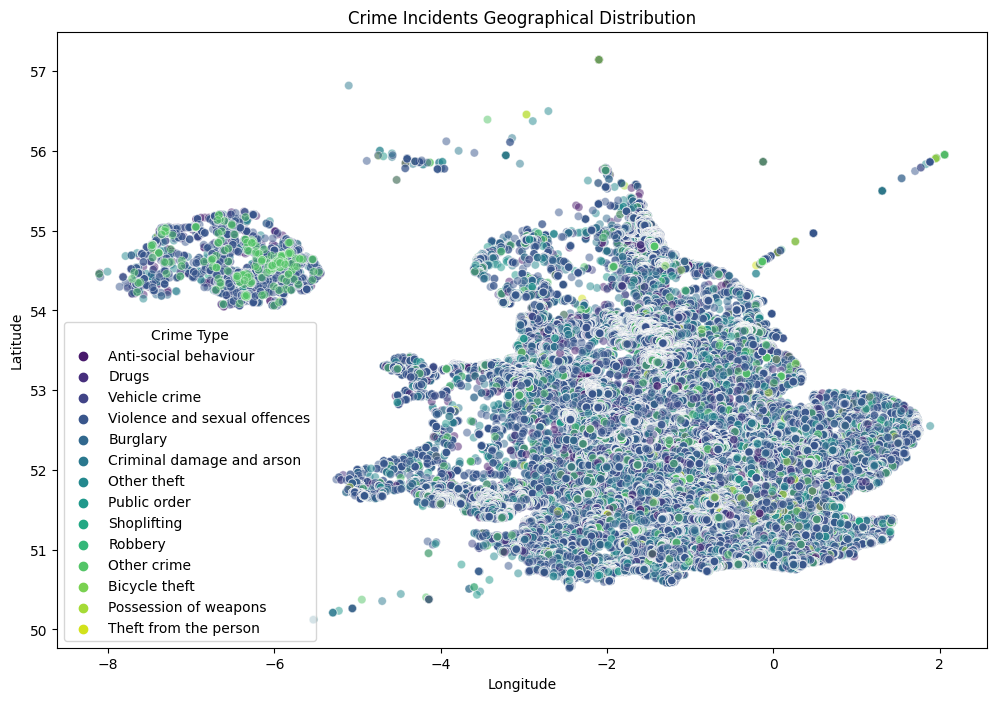

In [19]:
# Latitude and Longitude scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Crime type', palette='viridis', alpha=0.5)
plt.title('Crime Incidents Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type')
plt.show()

In [ ]:
#['Anti-social behaviour' 'Drugs' 'Vehicle crime' 'Violence and sexual offences' 'Burglary' 'Criminal damage and arson' 'Other theft' 'Public order' 'Shoplifting' 'Robbery' 'Other crime' 'Bicycle theft' 'Possession of weapons' 'Theft from the person']

# Assuming 'Crime type' is the column containing the crime types
desired_crime_type = 'Drugs'

# Filter the DataFrame for the desired crime type
filtered_data = data[data['Crime type'] == desired_crime_type]

# Drop rows with missing values in 'Latitude' and 'Longitude' from the filtered data
filtered_data = filtered_data.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
crime_map = folium.Map(location=[filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()], zoom_start=10)

# Create a MarkerCluster layer for better performance with many markers
marker_cluster = MarkerCluster().add_to(crime_map)

# Add markers for each crime incident
for index, row in filtered_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"Crime Type: {row['Crime type']}").add_to(marker_cluster)

# Save the map as an HTML file or display it
#crime_map.save("crime_map_for_" + desired_crime_type.replace(' ', '_') + ".html")  # Save the map as an HTML file

display(crime_map)